# Introduction

This notebook simulates the top mass reweighting by using Gaussian with mean 172.5 and 175 with with large variance. It investigates the effect of statistics size to reweighting results. It appears that with large enough data points, the reweighting can work better (around 10^6 in this case)

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

## Imports

In [16]:
# standard library imports
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras.layers import Lambda, Dense, Input, Layer, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.backend import concatenate

# standard numerical library imports
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

In [17]:
# Global plot settings
from matplotlib import rc
import matplotlib.font_manager
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22) 
rc('xtick', labelsize=15) 
rc('ytick', labelsize=15) 
rc('legend', fontsize=15)

# Scanning value for reweighting from $\mathcal{N}(172.5, \sigma)$ to $\mathcal{N}(175, \sigma)$

## Build datasets

In [18]:
def reweight(n_data_points):
    mu0 = 172.5
    mu1 = 175
    sigma = 30
    var0 = sigma
    var1 = sigma

    X0 = np.random.normal(mu0, var0, n_data_points)
    X1 = np.random.normal(mu1, var1, n_data_points)
    
    bins = np.linspace(100,250,50)
    plt.hist(X0, bins = bins, alpha = 0.5, label = r'$\mu=172.5$')
    plt.hist(X1, bins = bins, alpha = 0.5, label = r'$\mu=175$')
    plt.legend()
    plt.title("Data for reweighting with $\sigma= $ "+ str(sigma))
    plt.show()

    Y0 = to_categorical(np.zeros(n_data_points), num_classes=2)
    Y1 = to_categorical(np.ones(n_data_points), num_classes=2)

    X = np.concatenate((X0, X1))
    Y = np.concatenate((Y0, Y1))

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    inputs = Input((1,))
    hidden_layer_1 = Dense(20, activation='relu')(inputs)
    hidden_layer_2 = Dense(20, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(20, activation='relu')(hidden_layer_2)

    outputs = Dense(2, activation='softmax')(hidden_layer_3)

    model = Model(inputs = inputs, outputs = outputs)
    model.compile(loss='categorical_crossentropy', optimizer='Adam', )
    
    epochs_num = 10
    earlystopping = EarlyStopping(patience = epochs_num,)

    history = model.fit(X_train, Y_train, 
              epochs=epochs_num, 
              batch_size = 100,
              validation_data = (X_test, Y_test),
              callbacks = [earlystopping])
    plt.plot(history.history['loss'],     label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val loss')
    plt.legend(loc=0)
    plt.ylabel('loss')
    plt.xlabel('Epochs')
    plt.show()
    
    X0_val = np.random.normal(mu0, var0, n_data_points)
    X1_val = np.random.normal(mu1, var1, n_data_points)
    
    preds = model.predict(X0_val)
    weights = preds[:,1]/preds[:,0]
    
    bins = np.linspace(0.5,1.5,50)
    plt.hist(weights, bins = bins, alpha = 0.5)[0]
    plt.title("Distribution of weight")
    plt.show()
    
    bins = np.linspace(100,250,50)
    plt.hist(X0_val, bins = bins, alpha = 0.5, label = r'$\mu=172.5$')
    plt.hist(X0_val, bins = bins, label = r'$172.5$ weighted', weights=weights, histtype='step', color='k')
    plt.hist(X1_val, bins = bins, alpha = 0.5, label = r'$\mu=175$')
    plt.legend()
    plt.show()

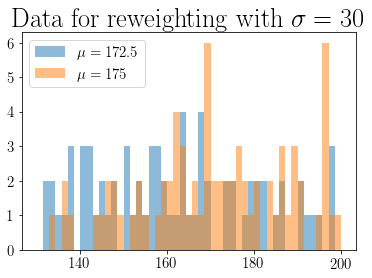

Train on 160 samples, validate on 40 samples
Epoch 1/15
160/160 [==============================] - 5s 31ms/step - loss: 3.4526 - val_loss: 2.5068
Epoch 2/15
160/160 [==============================] - 0s 75us/step - loss: 2.2102 - val_loss: 1.2666
Epoch 3/15
160/160 [==============================] - 0s 68us/step - loss: 1.0999 - val_loss: 0.7031
Epoch 4/15
160/160 [==============================] - 0s 66us/step - loss: 0.8113 - val_loss: 1.1355
Epoch 5/15
160/160 [==============================] - 0s 75us/step - loss: 1.2577 - val_loss: 1.2994
Epoch 6/15
160/160 [==============================] - 0s 67us/step - loss: 1.3623 - val_loss: 1.1123
Epoch 7/15
160/160 [==============================] - 0s 73us/step - loss: 1.1180 - val_loss: 0.8124
Epoch 8/15
160/160 [==============================] - 0s 64us/step - loss: 0.8002 - val_loss: 0.6965
Epoch 9/15
160/160 [==============================] - 0s 61us/step - loss: 0.7172 - val_loss: 0.8290
Epoch 10/15
160/160 [=========================

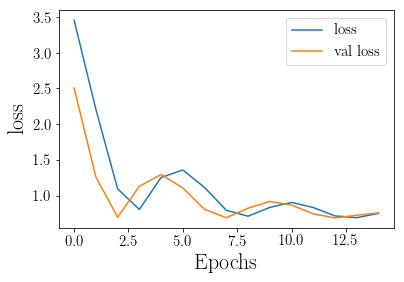

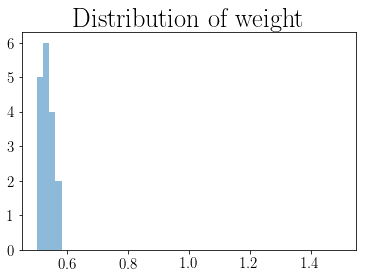

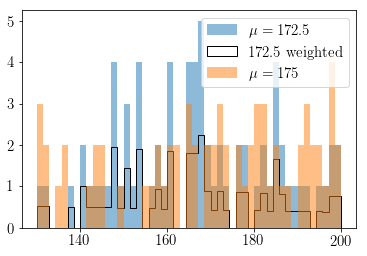

In [5]:
reweight(10**2)

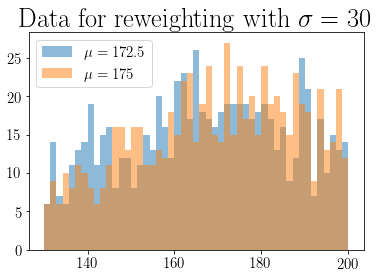

Train on 1600 samples, validate on 400 samples
Epoch 1/15
1600/1600 [==============================] - 1s 461us/step - loss: 3.3213 - val_loss: 1.2948
Epoch 2/15
1600/1600 [==============================] - 0s 44us/step - loss: 0.8264 - val_loss: 0.7495
Epoch 3/15
1600/1600 [==============================] - 0s 45us/step - loss: 0.7345 - val_loss: 0.7012
Epoch 4/15
1600/1600 [==============================] - 0s 46us/step - loss: 0.7107 - val_loss: 0.6942
Epoch 5/15
1600/1600 [==============================] - 0s 44us/step - loss: 0.7022 - val_loss: 0.6957
Epoch 6/15
1600/1600 [==============================] - 0s 45us/step - loss: 0.7012 - val_loss: 0.6950
Epoch 7/15
1600/1600 [==============================] - 0s 45us/step - loss: 0.6986 - val_loss: 0.7104
Epoch 8/15
1600/1600 [==============================] - 0s 46us/step - loss: 0.6979 - val_loss: 0.7382
Epoch 9/15
1600/1600 [==============================] - 0s 47us/step - loss: 0.7038 - val_loss: 0.7017
Epoch 10/15
1600/1600 [==

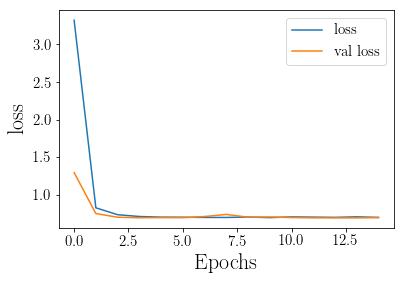

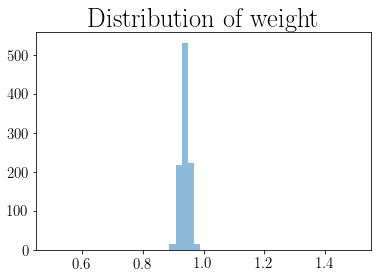

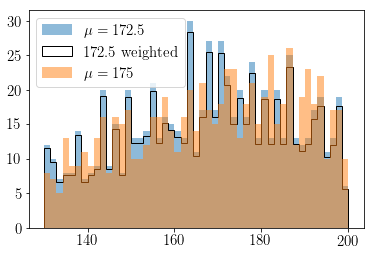

In [6]:
reweight(10**3)

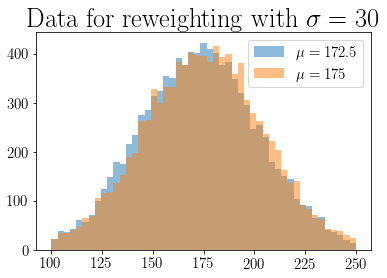

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 2s 141us/step - loss: 1.4093 - val_loss: 0.7075
Epoch 2/10
16000/16000 [==============================] - 1s 52us/step - loss: 0.7085 - val_loss: 0.6950
Epoch 3/10
16000/16000 [==============================] - 1s 52us/step - loss: 0.7064 - val_loss: 0.7009
Epoch 4/10
16000/16000 [==============================] - 1s 50us/step - loss: 0.7085 - val_loss: 0.7226
Epoch 5/10
16000/16000 [==============================] - 1s 50us/step - loss: 0.7124 - val_loss: 0.6967
Epoch 6/10
16000/16000 [==============================] - 1s 51us/step - loss: 0.7155 - val_loss: 0.6924
Epoch 7/10
16000/16000 [==============================] - 1s 50us/step - loss: 0.7158 - val_loss: 0.7167
Epoch 8/10
16000/16000 [==============================] - 1s 49us/step - loss: 0.7013 - val_loss: 0.7086
Epoch 9/10
16000/16000 [==============================] - 1s 47us/step - loss: 0.7152 - val_loss: 0.8265
Epoch

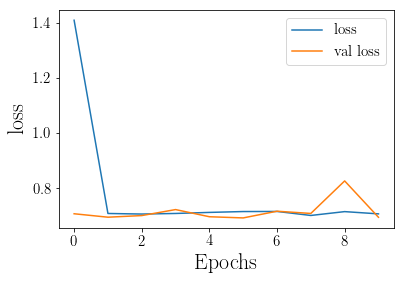

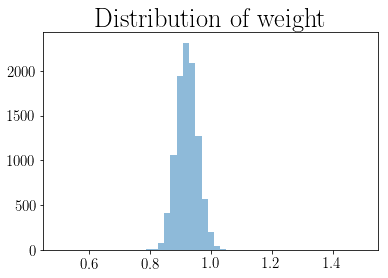

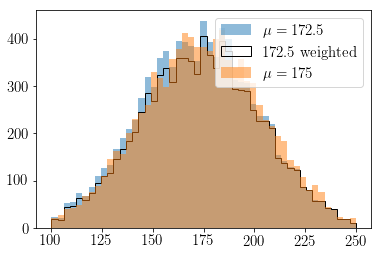

In [25]:
reweight(10**4)

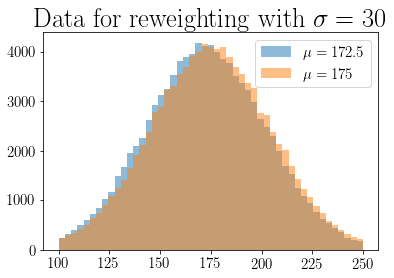

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 9s 58us/step - loss: 0.9175 - val_loss: 0.6942
Epoch 2/10
160000/160000 [==============================] - 7s 47us/step - loss: 0.6942 - val_loss: 0.6925
Epoch 3/10
160000/160000 [==============================] - 8s 47us/step - loss: 0.6935 - val_loss: 0.6936
Epoch 4/10
160000/160000 [==============================] - 7s 47us/step - loss: 0.6929 - val_loss: 0.6932
Epoch 5/10
160000/160000 [==============================] - 7s 47us/step - loss: 0.6928 - val_loss: 0.6929
Epoch 6/10
160000/160000 [==============================] - 7s 47us/step - loss: 0.6928 - val_loss: 0.6926
Epoch 7/10
160000/160000 [==============================] - 7s 47us/step - loss: 0.6929 - val_loss: 0.6926
Epoch 8/10
160000/160000 [==============================] - 7s 47us/step - loss: 0.6928 - val_loss: 0.6927
Epoch 9/10
160000/160000 [==============================] - 7s 47us/step - loss: 0.6928 - val

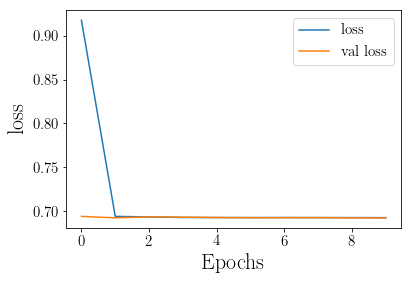

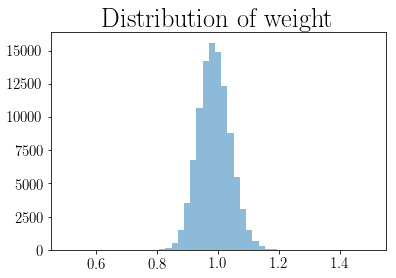

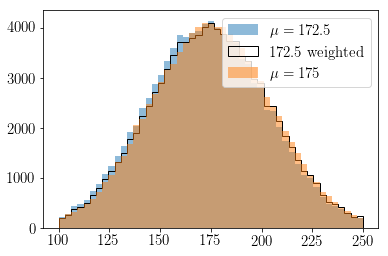

In [19]:
reweight(10**5)

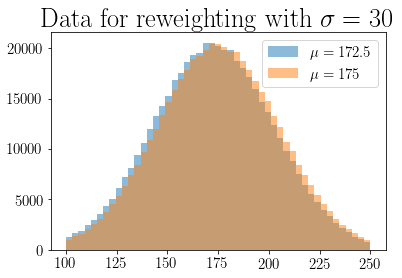

Train on 800000 samples, validate on 200000 samples
Epoch 1/10
800000/800000 [==============================] - 39s 49us/step - loss: 0.7537 - val_loss: 0.7253
Epoch 2/10
800000/800000 [==============================] - 38s 47us/step - loss: 0.6978 - val_loss: 0.6948
Epoch 3/10
800000/800000 [==============================] - 38s 47us/step - loss: 0.6931 - val_loss: 0.6932
Epoch 4/10
800000/800000 [==============================] - 38s 47us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 5/10
800000/800000 [==============================] - 38s 47us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 6/10
800000/800000 [==============================] - 38s 47us/step - loss: 0.6932 - val_loss: 0.6931
Epoch 7/10
800000/800000 [==============================] - 38s 47us/step - loss: 0.6932 - val_loss: 0.6931
Epoch 8/10
800000/800000 [==============================] - 38s 47us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 9/10
800000/800000 [==============================] - 38s 47us/step - loss: 0.

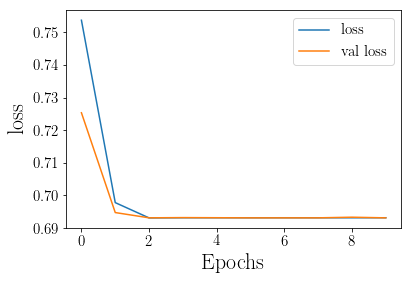

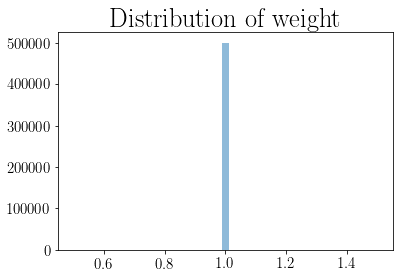

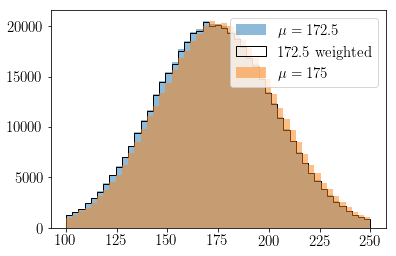

In [20]:
reweight(5*10**5)

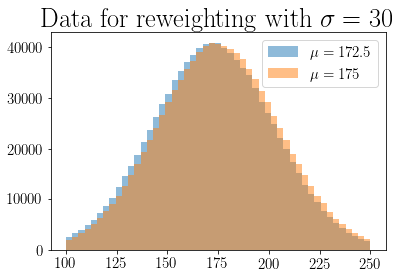

Train on 1600000 samples, validate on 400000 samples
Epoch 1/10
1600000/1600000 [==============================] - 77s 48us/step - loss: 0.7037 - val_loss: 0.6944
Epoch 2/10
1600000/1600000 [==============================] - 76s 48us/step - loss: 0.6928 - val_loss: 0.6930
Epoch 3/10
1600000/1600000 [==============================] - 76s 47us/step - loss: 0.6926 - val_loss: 0.6923
Epoch 4/10
1600000/1600000 [==============================] - 75s 47us/step - loss: 0.6925 - val_loss: 0.6924
Epoch 5/10
1600000/1600000 [==============================] - 76s 47us/step - loss: 0.6925 - val_loss: 0.6923
Epoch 6/10
1600000/1600000 [==============================] - 75s 47us/step - loss: 0.6925 - val_loss: 0.6924
Epoch 7/10
1600000/1600000 [==============================] - 75s 47us/step - loss: 0.6925 - val_loss: 0.6927
Epoch 8/10
1600000/1600000 [==============================] - 76s 47us/step - loss: 0.6925 - val_loss: 0.6928
Epoch 9/10
1600000/1600000 [==============================] - 75s 4

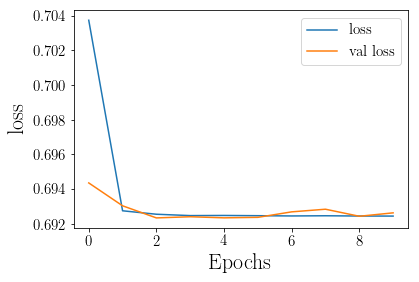

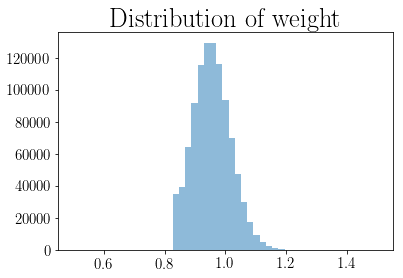

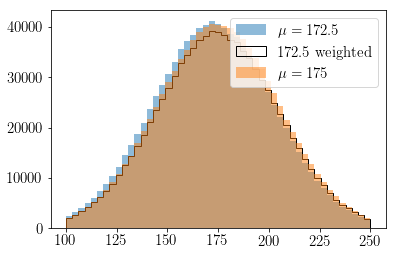

In [21]:
reweight(10**6)

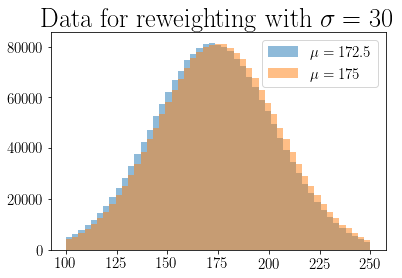

Train on 3200000 samples, validate on 800000 samples
Epoch 1/10
3200000/3200000 [==============================] - 154s 48us/step - loss: 0.7110 - val_loss: 0.6925
Epoch 2/10
3200000/3200000 [==============================] - 152s 48us/step - loss: 0.6926 - val_loss: 0.6933
Epoch 3/10
3200000/3200000 [==============================] - 153s 48us/step - loss: 0.6925 - val_loss: 0.6923
Epoch 4/10
3200000/3200000 [==============================] - 152s 47us/step - loss: 0.6925 - val_loss: 0.6923
Epoch 5/10
3200000/3200000 [==============================] - 152s 48us/step - loss: 0.6925 - val_loss: 0.6923
Epoch 6/10
3200000/3200000 [==============================] - 152s 48us/step - loss: 0.6924 - val_loss: 0.6923
Epoch 7/10
3200000/3200000 [==============================] - 152s 47us/step - loss: 0.6924 - val_loss: 0.6923
Epoch 8/10
3200000/3200000 [==============================] - 161s 50us/step - loss: 0.6924 - val_loss: 0.6923
Epoch 9/10
3200000/3200000 [==============================]

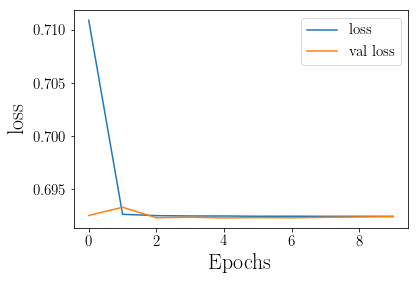

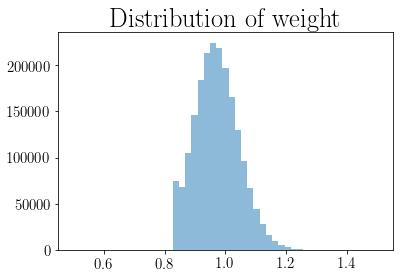

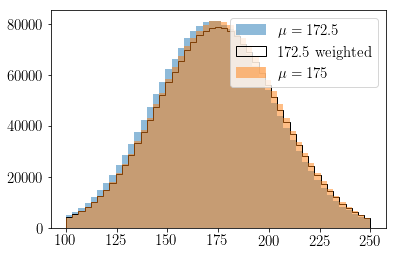

In [23]:
reweight(2*10**6)